# Hipótesis

Después de analizar y limpiar los datos, me he quedado con una base de datos en la que tengo los ataques de tiburón filtrados por meses y países.
Quiero demostrar que los tiburones atacan más durante los meses de verano.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
attacks_hp = pd.read_csv("Data/attacks_month.csv")

In [4]:
attacks_hp.sample(5)

,month,country
1128,December,south africa
2421,July,usa
3288,March,usa
2209,July,panama
3584,May,usa


In [5]:
group = attacks_hp.country.value_counts()
group

usa             2021
australia       1154
south africa     524
brazil           106
new zealand      101
                ... 
the balkans        1
north sea          1
guinea             1
guyana             1
lebanon            1
Name: country, Length: 161, dtype: int64

In [6]:
attacks_hp.month.unique()

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

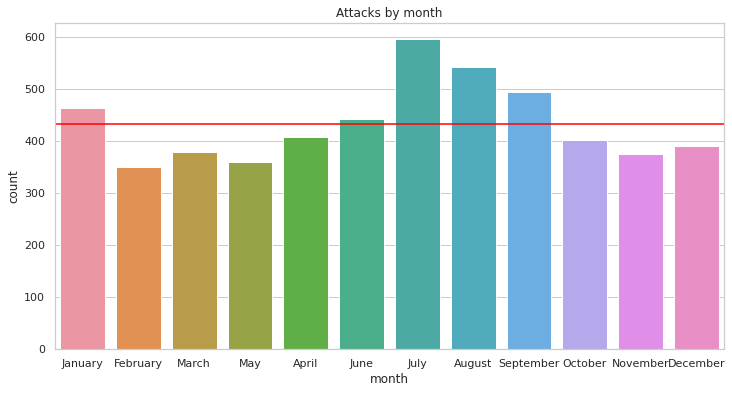

In [7]:
month_lst = ["January", "February", "March", "May", "April", "June", "July", "August", "September", "October", "November", "December"]
graf = sns.countplot(x = "month", data = attacks_hp, order = month_lst)
graf.axhline(y=attacks_hp.month.value_counts().mean(), c="red", label="mean")
plt.title("Attacks by month");

En este gráfico podemos ver el número de ataques por meses. Viendo la línea que marca la media, realmente no existe una gran diferencia entre unos meses y otros, por lo que así no podemos demostrar que los tiburones atacan más en verano. Sin embargo, los datos con los que estamos trabajando son a nivel mundial, y los meses de verano no son los mismos en el hemisferio norte que en el sur.

In [8]:
usa = attacks_hp[attacks_hp["country"] == "usa"]
australia = attacks_hp[attacks_hp["country"] == "australia"]
south_africa = attacks_hp[attacks_hp["country"] == "south africa"]
bahamas = attacks_hp[attacks_hp["country"] == "bahamas"]

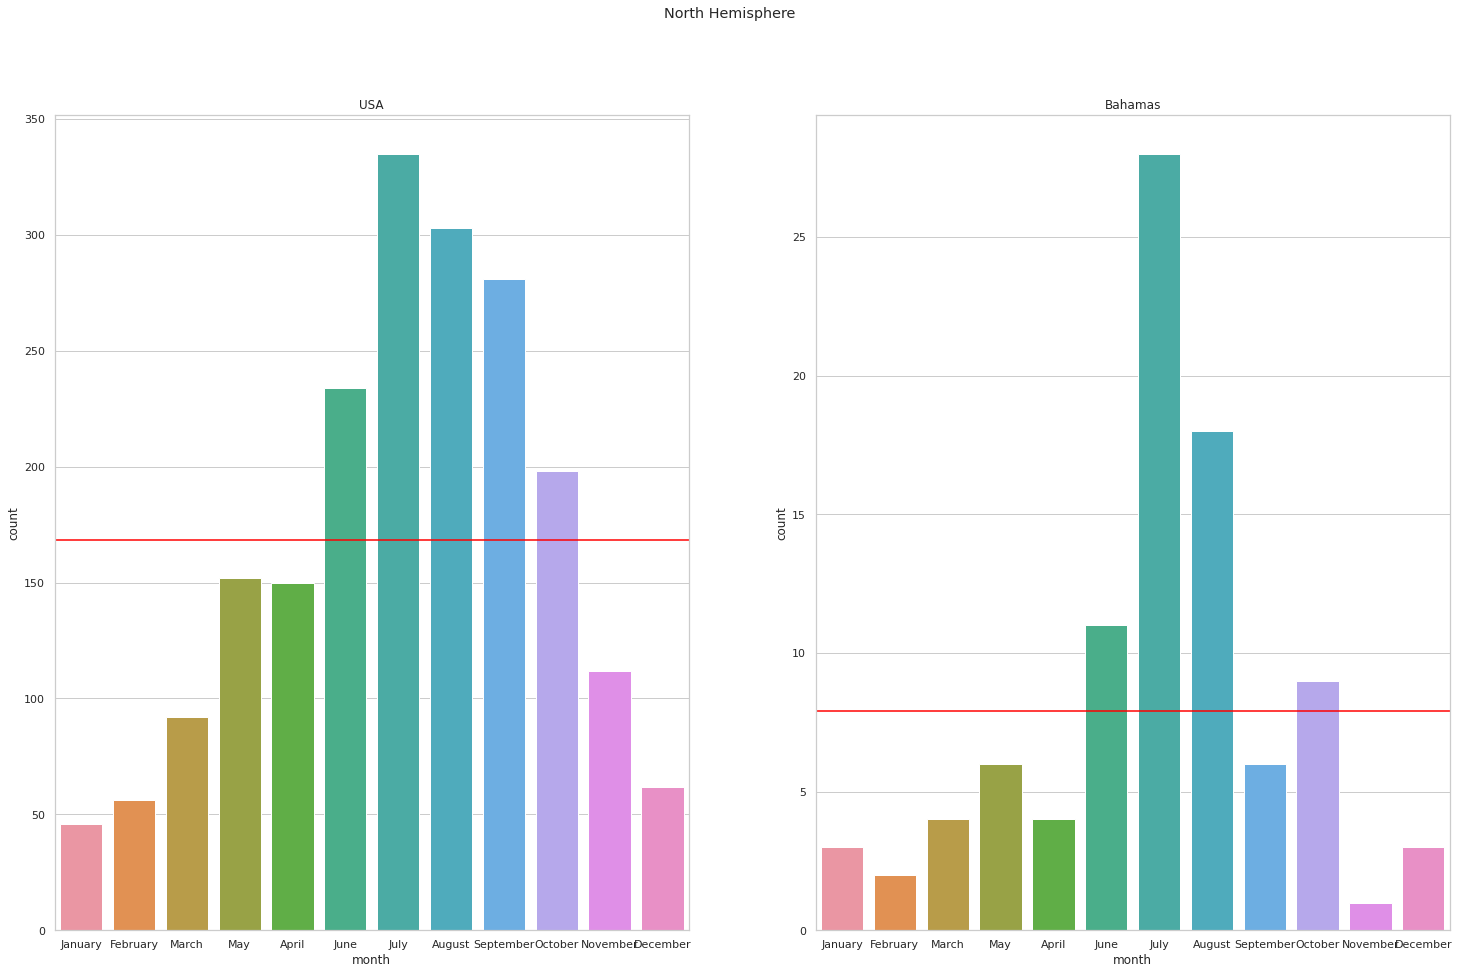

In [31]:
sub_plot1 = figura, eje = plt.subplots(nrows=1, ncols=2, figsize=(25,15))
figura.suptitle('North Hemisphere')
eje[0].set_title('USA')
eje[1].set_title('Bahamas')
usa_plot = sns.countplot(x = "month", data = usa, order = month_lst, ax=eje[0])
usa_plot.axhline(y=usa.month.value_counts().mean(), c="red", label="mean")
#plt.title("Attacks by month")
bahamas_plot = sns.countplot(x = "month", data = bahamas, order = month_lst, ax=eje[1])
bahamas_plot.axhline(y=bahamas.month.value_counts().mean(), c="red", label="mean");


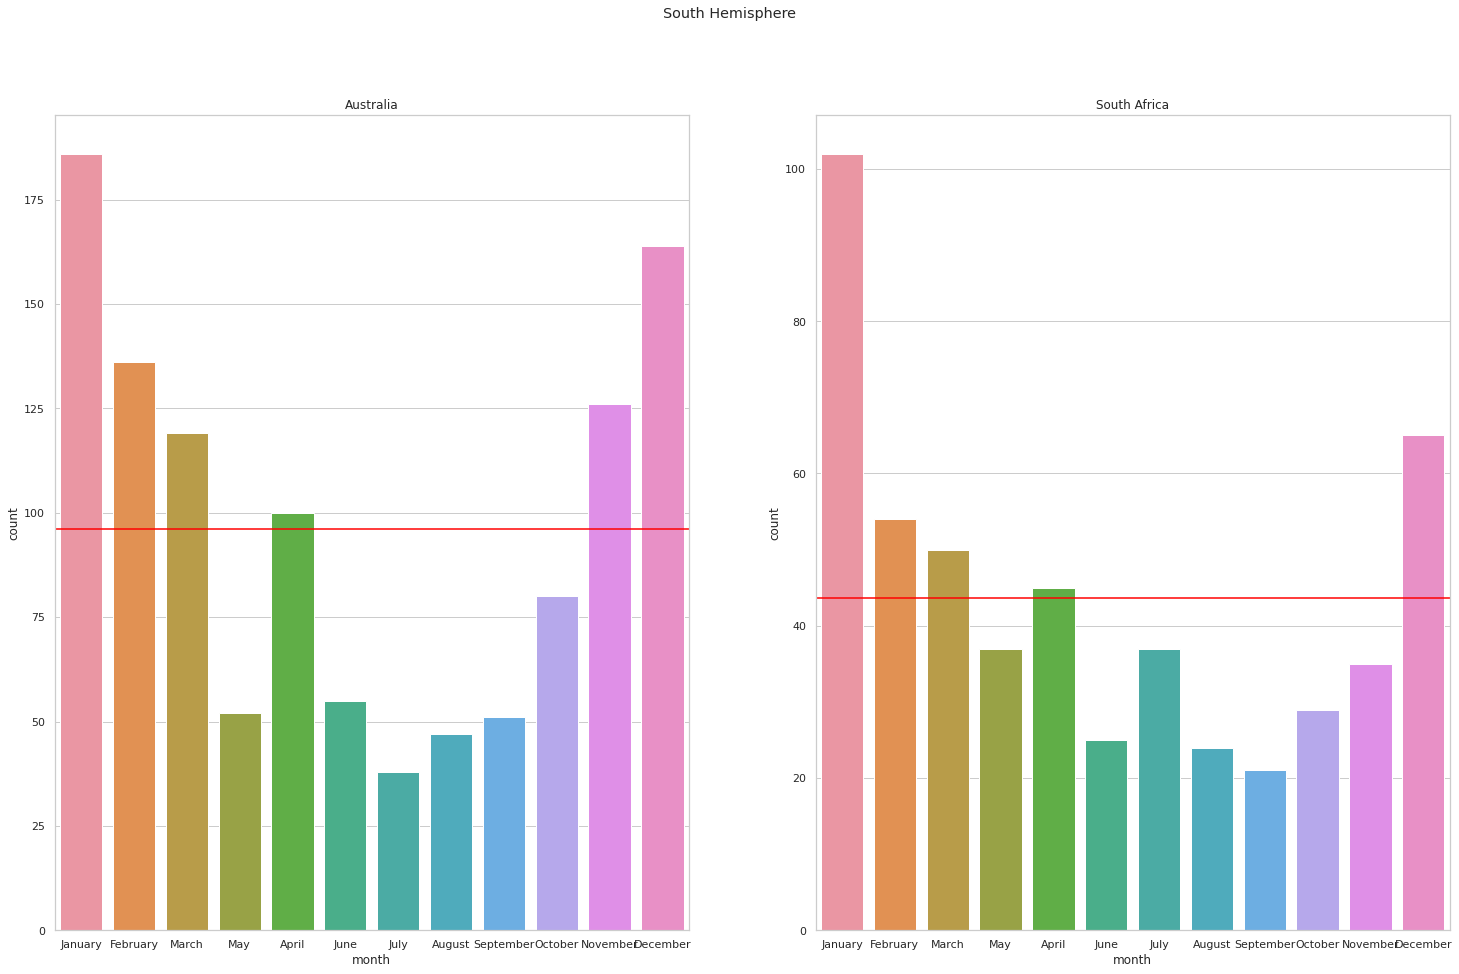

In [32]:
figura, eje = plt.subplots(nrows=1, ncols=2, figsize=(25,15))
figura.suptitle('South Hemisphere')
eje[0].set_title('Australia')
eje[1].set_title('South Africa')
australia_plot = sns.countplot(x = "month", data = australia, order = month_lst, ax=eje[0])
australia_plot.axhline(y=australia.month.value_counts().mean(), c="red", label="mean")
south_africa_plot = sns.countplot(x = "month", data = south_africa, order = month_lst, ax=eje[1])
south_africa_plot.axhline(y=south_africa.month.value_counts().mean(), c="red", label="mean");